<a href="https://colab.research.google.com/github/UAMCAntwerpen/2040FBDBIC/blob/master/Topic_02/Clustering_and_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Install RDKit

In [1]:
!pip install rdkit mols2grid requests

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.2/36.2 MB 40.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 35.2 MB/s eta 0:00:00


In [2]:
# RDKit chemistry
from rdkit import Chem

# RDKit drawing
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import rdDepictor
IPythonConsole.ipython_useSVG = True
rdDepictor.SetPreferCoordGen(True)

# Library to display molecules in a grid
import mols2grid

# Library to download files
import requests

## Linear path-based FP's

10 bits ON out of the 10 bits in total
92 bits ON out of the 100 bits in total
223 bits ON out of the 1024 bits in total


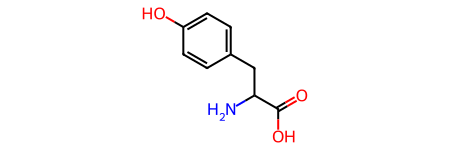

In [3]:
mol = Chem.MolFromSmiles("Oc1ccc(CC(N)C(O)=O)cc1")

for fp_size in (10, 100, 1024):
  fp = Chem.RDKFingerprint(mol, fpSize=fp_size)
  print(len(list(fp.GetOnBits())), "bits ON out of the", len(fp), "bits in total")

mol

14 bits ON out of the 2048 bits in total
59 bits ON out of the 2048 bits in total
130 bits ON out of the 2048 bits in total
233 bits ON out of the 2048 bits in total


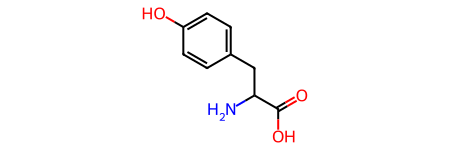

In [4]:
mol = Chem.MolFromSmiles("Oc1ccc(CC(N)C(O)=O)cc1")

for max_path_length in (1,3,5,7):
  fp = Chem.RDKFingerprint(mol, maxPath=max_path_length)
  print(len(list(fp.GetOnBits())), "bits ON out of the", len(fp), "bits in total")

mol

## Circular FP's (ECFP)

Radius 1 : 11 bits ON out of the 1024 bits in total
Radius 2 : 16 bits ON out of the 1024 bits in total
Radius 3 : 17 bits ON out of the 1024 bits in total
Radius 4 : 17 bits ON out of the 1024 bits in total
Radius 5 : 17 bits ON out of the 1024 bits in total
Radius 6 : 17 bits ON out of the 1024 bits in total
Radius 7 : 17 bits ON out of the 1024 bits in total


[10:08:49] DEPRECATION WARNING: please use MorganGenerator
[10:08:49] DEPRECATION WARNING: please use MorganGenerator
[10:08:49] DEPRECATION WARNING: please use MorganGenerator
[10:08:49] DEPRECATION WARNING: please use MorganGenerator
[10:08:49] DEPRECATION WARNING: please use MorganGenerator
[10:08:49] DEPRECATION WARNING: please use MorganGenerator
[10:08:49] DEPRECATION WARNING: please use MorganGenerator


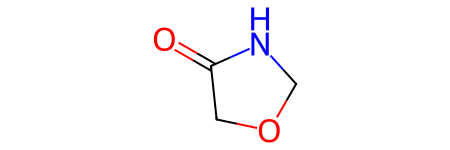

In [5]:
from rdkit.Chem import AllChem
mol = Chem.MolFromSmiles("O1CC(=O)NC1")

for radius in range(1,8):
  fp = AllChem.GetMorganFingerprintAsBitVect(mol,radius,nBits=1024)
  print("Radius", radius, ":", len(list(fp.GetOnBits())), "bits ON out of the", len(fp), "bits in total")

mol

## MACCS keys

26 bits ON out of the 167 bits in total
[54, 84, 90, 95, 104, 111, 113, 123, 127, 131, 139, 143, 146, 151, 152, 154, 155, 156, 157, 158, 159, 161, 162, 163, 164, 165]


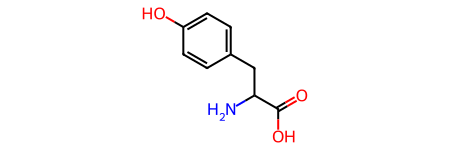

In [6]:
from rdkit.Chem import MACCSkeys

mol = Chem.MolFromSmiles("Oc1ccc(CC(N)C(O)=O)cc1")
fp = MACCSkeys.GenMACCSKeys(mol)
print(len(list(fp.GetOnBits())), "bits ON out of the", len(fp), "bits in total")
print(list(fp.GetOnBits()))
mol

## Calculating similarity

In [7]:
from rdkit import DataStructs

mol1 = Chem.MolFromSmiles("CCOC")
fp1 = Chem.RDKFingerprint(mol1, fpSize=50)
print(fp1.ToBitString())

mol2 = Chem.MolFromSmiles("CCO")
fp2 = Chem.RDKFingerprint(mol2, fpSize=50)
print(fp2.ToBitString())

tanimoto = DataStructs.FingerprintSimilarity(fp1, fp2)
print(tanimoto)

00000000101000001000001011010000000000000001000100
00000000001000001000000011010000000000000000000000
0.5555555555555556


In [8]:
smiles = ["CO", "CCCO", "CCCOCCC"]
mols = []
for s in smiles: mols.append(Chem.MolFromSmiles(s))
fps = []
for mol in mols: fps.append(Chem.RDKFingerprint(mol))
ref = Chem.RDKFingerprint(Chem.MolFromSmiles("CCCO"))

for fp in fps:
  tversky = DataStructs.TverskySimilarity(ref, fp, 0.1, 0.9)
  print("%.2f" % tversky)

print()
for fp in fps:
  tversky = DataStructs.TverskySimilarity(ref, fp, 0.9, 0.1)
  print("%.2f" % tversky)


0.71
1.00
0.48

0.22
1.00
0.89


## Similarity in practice

In this exercise, a file with 10,000 compounds (SMILES format) is downloaded from the UAMC GitHub repo, and then a similarity search is performed to identify the compound that is most similar to aspirin ("CC(=O)OC1=CC=CC=C1C(=O)O")

In [9]:
url = "https://raw.githubusercontent.com/UAMCAntwerpen/2040FBDBIC/master/Topic_02/Compounds_10k.smi"
smiles = requests.get(url).text.split("\n")

Aspirin is the query molecule:

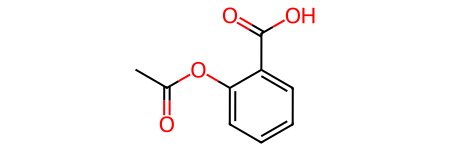

In [10]:
aspirin = Chem.MolFromSmiles("CC(=O)OC1=CC=CC=C1C(=O)O")
query = Chem.RDKFingerprint(aspirin)
aspirin

Loop over all molecules and keep the one with the highest similarity to aspirin:

In [11]:
max_sim = 0.0
best_hit = ""
for s in smiles:
  mol = Chem.MolFromSmiles(s)
  fp = Chem.RDKFingerprint(mol)
  tanimoto = DataStructs.FingerprintSimilarity(fp, query)
  if tanimoto >= max_sim:
    max_sim = tanimoto
    best_hit = s

Show the best molecule:

0.570264765784114


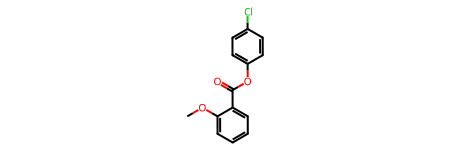

In [12]:
mol = Chem.MolFromSmiles(best_hit)
print(max_sim)
mol

Note: you can also use other similarity metrics such as the Tversky coefficient. Try this out to see how the results will alter.

## Maximal common substructure (MCSS)

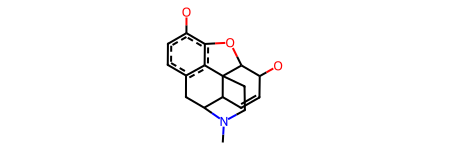

In [13]:
from rdkit.Chem import rdFMCS

morphine = Chem.MolFromSmiles("CN1CC[C@]23C4=C5C=CC(O)=C4O[C@H]2[C@H](C=C[C@H]3[C@H]1C5)O")
codeine = Chem.MolFromSmiles("CN1CC[C@]23[C@@H]4[C@H]1CC5=C2C(O[C@H]3[C@@H](O)C=C4)=C(OC)C=C5")
heroine = Chem.MolFromSmiles("CN([C@H](CC(C=C1)=C23)[C@@H]4C=C[C@@H]5OC(C)=O)CC[C@]43[C@H]5OC2=C1OC(C)=O")

mols = [morphine, codeine, heroine]
mcss = rdFMCS.FindMCS(mols)
Chem.MolFromSmarts(mcss.smartsString)

## Clustering

Read in six molecules:

[10:09:21] DEPRECATION WARNING: please use MorganGenerator
[10:09:21] DEPRECATION WARNING: please use MorganGenerator
[10:09:21] DEPRECATION WARNING: please use MorganGenerator
[10:09:21] DEPRECATION WARNING: please use MorganGenerator
[10:09:21] DEPRECATION WARNING: please use MorganGenerator
[10:09:21] DEPRECATION WARNING: please use MorganGenerator


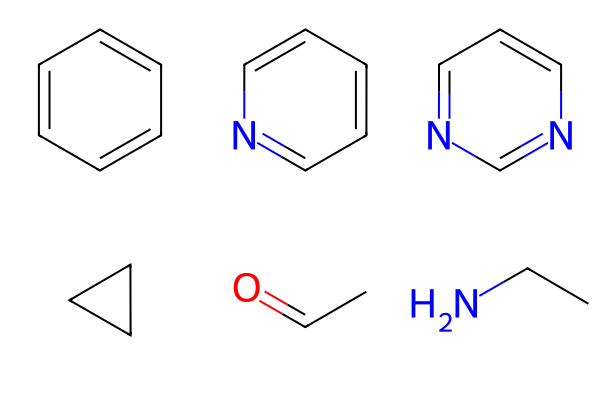

In [14]:
smiles = ["c1ccccc1", "c1cccnc1", "c1ncncc1", "C1CC1", "CC=O", "NCC"]
mols = [Chem.MolFromSmiles(x) for x in smiles]
fps = [AllChem.GetMorganFingerprintAsBitVect(x, 2, nBits=20) for x in mols]
display(Draw.MolsToGridImage(mols, molsPerRow=3))

Show their fingerprints:

In [15]:
import numpy as np
for i in range(len(fps)): print("%s %s" % (fps[i].ToBitString(), smiles[i]))

00001000010001000000 c1ccccc1
00011101011001100001 c1cccnc1
00011100011001100100 c1ncncc1
10000000000000100000 C1CC1
00000000001000001110 CC=O
00000100000010100101 NCC


Convert the fingerprints to a format that is useable by a clustering algorithm:

In [16]:
nps = [np.array(x) for x in fps]
X = np.array(nps)
print(X)

[[0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 1 1 1 0 1 0 1 1 0 0 1 1 0 0 0 0 1]
 [0 0 0 1 1 1 0 0 0 1 1 0 0 1 1 0 0 1 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1]]


Do an hierarchical clustering:

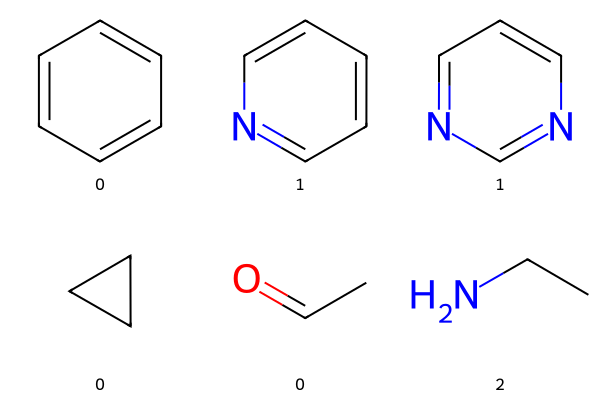

In [17]:
import sklearn
from sklearn.cluster import AgglomerativeClustering
clusterEngine = AgglomerativeClustering(n_clusters = 3)
clusterEngine.fit(X)

labels = [str(x) for x in clusterEngine.labels_]
display(Draw.MolsToGridImage(mols, molsPerRow=3, legends=labels))

And now non-hierarchical clustering (k-means):

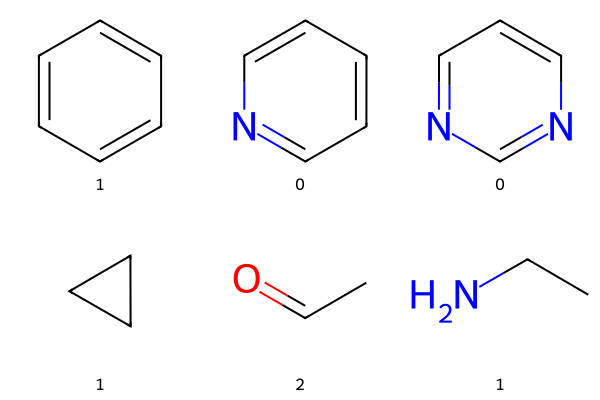

In [18]:
from sklearn.cluster import KMeans
clusterEngine = KMeans(n_clusters = 3)
clusterEngine.fit(X)

labels = [str(x) for x in clusterEngine.labels_]
display(Draw.MolsToGridImage(mols, molsPerRow=3, legends=labels))

In [19]:
centers = clusterEngine.cluster_centers_
print(centers)

[[0.         0.         0.         1.         1.         1.
  0.         0.5        0.         1.         1.         0.
  0.         1.         1.         0.         0.         0.5
  0.         0.5       ]
 [0.33333333 0.         0.         0.         0.33333333 0.33333333
  0.         0.         0.         0.33333333 0.         0.
  0.33333333 0.33333333 0.66666667 0.         0.         0.33333333
  0.         0.33333333]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         1.         0.
  0.         0.         0.         0.         1.         1.
  1.         0.        ]]


# Machine learning: QSAR models

## An example of a simple model: linear regression

Read in a dataset of DPP4 inhibitors with corresponding pIC50 inhibition constants:

In [20]:
url = "https://raw.githubusercontent.com/UAMCAntwerpen/2040FBDBIC/master/Topic_02/dpp4.pIC50.txt"
data = requests.get(url).text.split("\n")
print(data[0])

N[C@H](C(=O)N1CC[C@H](F)C1)C1CCC(NS(=O)(=O)c2ccc(F)cc2F)CC1	7.32


Split into smiles, mols, fps and pIC50:

In [21]:
mols = []
smiles = []
fps = []
pic50 = []
for d in data:
  fields = d.split()
  if len(fields) < 1: continue
  smiles.append(fields[0])
  pic50.append(float(fields[1]))
  mol = Chem.MolFromSmiles(fields[0])
  mols.append(mol)
  fp = np.zeros((0,), dtype=np.int8)
  DataStructs.ConvertToNumpyArray(Chem.RDKFingerprint(mol), fp)
  fps.append(fp)
print(smiles[0])
print(pic50[0])
print(fps[0])
print(max(pic50))
print(min(pic50))
print(len(smiles))

N[C@H](C(=O)N1CC[C@H](F)C1)C1CCC(NS(=O)(=O)c2ccc(F)cc2F)CC1
7.32
[0 1 1 ... 1 0 1]
10.92
4.0
3858


Create a training set (70%) and a test set (30%):

In [22]:
from sklearn.model_selection import train_test_split

pic50_train, pic50_test, fps_train, fps_test = train_test_split(pic50, fps, test_size=0.3, random_state=42)
print(len(pic50_train), len(pic50_test))

2700 1158


Train a linear regression model:

In [23]:
from sklearn import linear_model

model = linear_model.LinearRegression()
model.fit(fps_train, pic50_train)
print(model.coef_)

[-1.19183471  1.14758749  0.77929443 ...  0.18272035  0.82914222
 -3.20376615]


Apply the trained model on the test set and compare the predicted values with the experimental ones:

In [24]:
pic50_pred = model.predict(fps_test)
print(pic50_pred)

[ 5.04302546  7.70686352 10.78220042 ...  7.14680847  9.82744807
  7.41976824]


Validate the model by calculating the MSE of the predictions when compared to the true values:

MSE =  13.059437179691749


Text(0, 0.5, 'Predicted values')

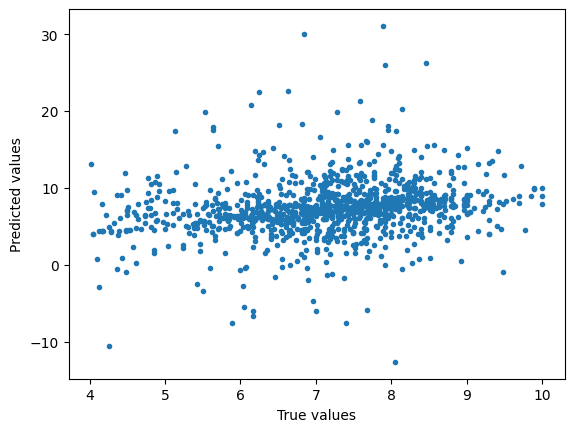

In [25]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

print("MSE = ", mean_squared_error(pic50_test, pic50_pred))
plt.plot(pic50_test, pic50_pred, '.')
plt.xlabel("True values")
plt.ylabel("Predicted values")

Repeat the test/train splitting a number of times in order to get statistics:

In [26]:
for i in range(5):
  pic50_train, pic50_test, fps_train, fps_test = train_test_split(pic50, fps, test_size=0.3)
  model.fit(fps_train, pic50_train)
  pic50_pred = model.predict(fps_test)
  print("MSE = ", mean_squared_error(pic50_test, pic50_pred))

MSE =  10.902094112569618
MSE =  9.534169033180481
MSE =  10.674434902286462
MSE =  13.386123686335033
MSE =  9.180724048388617


## A more complicated model: neural networks

MSE = 0.6927053799872565


Text(0, 0.5, 'Predicted values')

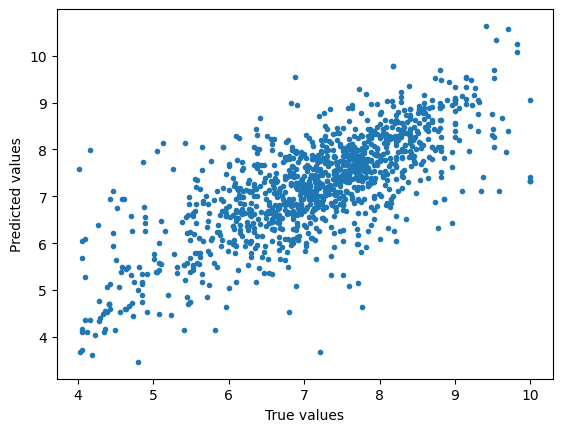

In [27]:
from sklearn.neural_network import MLPRegressor
model = MLPRegressor(random_state=1, max_iter=500)
model.fit(fps_train, pic50_train)
pic50_pred = model.predict(fps_test)
print("MSE =", mean_squared_error(pic50_test, pic50_pred))
plt.plot(pic50_test, pic50_pred, '.')
plt.xlabel("True values")
plt.ylabel("Predicted values")

Repeat the test/train splitting a number of times in order to get statistics:

In [28]:
for i in range(3):
  pic50_train, pic50_test, fps_train, fps_test = train_test_split(pic50, fps, test_size=0.3)
  model.fit(fps_train, pic50_train)
  pic50_pred = model.predict(fps_test)
  print("MSE =", mean_squared_error(pic50_test, pic50_pred))

MSE = 0.6601633169175893
MSE = 0.706197740084934
MSE = 0.6471480510515816


Now built a model using the entire dataset and save for later on:

In [29]:
pic50_predictor = MLPRegressor(max_iter=500)
pic50_predictor.fit(fps, pic50)

MLPRegressor(max_iter=500)

## Another model: random forest

Load a DPP4 dataset with actives and non-actives (classification model):

In [30]:
url = "https://raw.githubusercontent.com/UAMCAntwerpen/2040FBDBIC/master/Topic_02/dpp4.classified.txt"
data = requests.get(url).text.split("\n")
print(data[0])

COc1cc(OC)cc(c1)c2nc(N)c(CN)c(n2)c3ccc(Cl)cc3Cl	ACTIVE


Generate fingerprints and make a list of all the activities:

In [31]:
activities = []
fps = []
for d in data:
  if d is None or d == "": continue
  fields = d.split()
  if fields[1] == "ACTIVE": activities.append(1)
  if fields[1] == "INACTIVE": activities.append(0)
  mol = Chem.MolFromSmiles(fields[0])
  fp = np.zeros((0,), dtype=np.int8)
  DataStructs.ConvertToNumpyArray(Chem.RDKFingerprint(mol), fp)
  fps.append(fp)

print(len(activities), len(fps))

13858 13858


Let's count how many actives and inactives:

In [56]:
n_actives = 0
n_inactives = 0
for a in activities:
  if a == 1: n_actives += 1
  if a == 0: n_inactives += 1
print(f'Actives: {n_actives}')
print(f'Inactives: {n_inactives}')

Actives: 3858
Inactives: 10000


Train a random forest model to predict activity:

In [32]:
from sklearn.ensemble import RandomForestClassifier

act_train, act_test, fps_train, fps_test = train_test_split(activities, fps, test_size=0.3)
model = RandomForestClassifier(max_depth=2)
model.fit(fps_train, act_train)

RandomForestClassifier(max_depth=2)

Calculate the accuracy of the generated model:

In [33]:
from sklearn.metrics import accuracy_score

prediction = model.predict(fps_test)
print(accuracy_score(act_test, prediction))

0.8078403078403078


**Precision versus recall**

The **precision** metric is defined by TP / (TP + FP). A high precision is therefore obtained when the model **reduces the number of false positives**. A model with a high precision is useful in a situation where one wants to be sure that, if the model predicts a compound to be active, the compound is really active, however at the expense of missing some other actives. This might be useful when one wants to purchase compounds with a limited budget.

The **recall** metric is defined by TP / (TP + FN). A high recall is therefore obtained when the model **reduces the number of false negatives**. A model with a high recall is therefore useful in a situation where one wants to be sure that **all** active compounds in a database will be purchased, however at the expense of buying also compounds which are not active. This might be useful when one can purchase compounds with an unlimited budget.

Let us make a random forest model with a **high precision**. We can do this by tweaking some of the parameters in the random forest classifier. The main parameters to adjust when using these methods is *n_estimators* and *max_features*. The former is the number of trees in the forest. The larger the better, but also the longer it will take to compute. The latter is the size of the random subsets of features to consider when splitting a node. The lower the greater the reduction of variance, but also the greater the increase in bias.

In [87]:
from sklearn.metrics import precision_score

optimal_max_depth = 0
optimal_n_estimators = 0
optimal_max_features = 0
optimal_precision = 0
for max_depth in range(4,10):
  print(f'Max_depth: {max_depth}')
  for n_estimators in range(4,10):
    for max_features in range(4,10):
      precision = []
      for i in range(5): # Repeat 5 times to get average
        act_train, act_test, fps_train, fps_test = train_test_split(activities, fps, test_size=0.3)
        model = RandomForestClassifier(max_depth=max_depth, n_estimators=n_estimators, max_features=max_features)
        model.fit(fps_train, act_train)
        prediction = model.predict(fps_test)
        precision.append(precision_score(act_test, prediction))
      mean_precision = np.mean(precision)
      if mean_precision > optimal_precision:
        optimal_max_depth = max_depth
        optimal_n_estimators = n_estimators
        optimal_max_features = max_features
        optimal_precision = mean_precision
print(f'max_depth: {optimal_max_depth}, n_estimators: {optimal_n_estimators}, max_features: {optimal_max_features} -> precision = {optimal_precision}')

Max_depth: 4
Max_depth: 5
Max_depth: 6
Max_depth: 7
Max_depth: 8
Max_depth: 9
max_depth: 5, n_estimators: 9, max_features: 4 -> precision = 0.992577963108533


Now that we have the optimal parameters for a **high precision** model, let's train this model and count the number of TP's and FP's in the test set:

In [88]:
from sklearn.metrics import confusion_matrix

TP = []
FP = []
FN = []
for i in range(10): # Repeat 10 times to get average
  act_train, act_test, fps_train, fps_test = train_test_split(activities, fps, test_size=0.3)
  precision_model = RandomForestClassifier(max_depth=optimal_max_depth, n_estimators=optimal_n_estimators, max_features=optimal_max_features)

  precision_model.fit(fps_train, act_train)
  prediction = precision_model.predict(fps_test)

  tn, fp, fn, tp = confusion_matrix(act_test, prediction).ravel().tolist()

  TP.append(tp)
  FP.append(fp)
  FN.append(fn)

print(f'TP: {np.mean(TP)}')
print(f'FP: {np.mean(FP)}')
print(f'FN: {np.mean(FN)}')


TP: 492.3
FP: 6.1
FN: 662.3


Let us make a random forest model with a **high recall**:

In [89]:
from sklearn.metrics import recall_score

optimal_max_depth = 0
optimal_n_estimators = 0
optimal_max_features = 0
optimal_recall = 0
for max_depth in range(4,10):
  print(f'Max_depth: {max_depth}')
  for n_estimators in range(4,10):
    for max_features in range(4,10):
      recall = []
      for i in range(5): # Repeat 5 times to get average
        act_train, act_test, fps_train, fps_test = train_test_split(activities, fps, test_size=0.3)
        model = RandomForestClassifier(max_depth=max_depth, n_estimators=n_estimators, max_features=max_features)
        model.fit(fps_train, act_train)
        prediction = model.predict(fps_test)
        recall.append(recall_score(act_test, prediction))
      mean_recall = np.mean(recall)
      if mean_recall > optimal_recall:
        optimal_max_depth = max_depth
        optimal_n_estimators = n_estimators
        optimal_max_features = max_features
        optimal_recall = mean_recall
print(f'max_depth: {optimal_max_depth}, n_estimators: {optimal_n_estimators}, max_features: {optimal_max_features} -> recall = {optimal_recall}')

Max_depth: 4
Max_depth: 5
Max_depth: 6
Max_depth: 7
Max_depth: 8
Max_depth: 9
max_depth: 9, n_estimators: 9, max_features: 9 -> recall = 0.9060259607680464


Now that we have the optimal parameters for a high recall model, let's train this model and count the number of TP's and FP's in the test set:

In [90]:
TP = []
FP = []
FN = []
for i in range(10): # Repeat 10 times to get average
  act_train, act_test, fps_train, fps_test = train_test_split(activities, fps, test_size=0.3)
  recall_model = RandomForestClassifier(max_depth=optimal_max_depth, n_estimators=optimal_n_estimators, max_features=optimal_max_features)

  recall_model.fit(fps_train, act_train)
  prediction = recall_model.predict(fps_test)

  tn, fp, fn, tp = confusion_matrix(act_test, prediction).ravel().tolist()

  TP.append(tp)
  FP.append(fp)
  FN.append(fn)

print(f'TP: {np.mean(TP)}')
print(f'FP: {np.mean(FP)}')
print(f'FN: {np.mean(FN)}')

TP: 1045.0
FP: 17.0
FN: 121.0


Apply this model on a database of 100k compounds and search for DPP4 actives:

In [91]:
url = "https://raw.githubusercontent.com/UAMCAntwerpen/2040FBDBIC/master/Topic_02/Compounds_100k.smi"
data = requests.get(url).text.split("\n")
print(data[0])

COc1cccc(-n2c(-c3cccs3)cn3c4c(=O)n(C)c(=O)n(C)c4nc23)c1


Calculate fingerprints:

In [92]:
db_fps = []
for d in data:
  if d == "" or d is None: continue
  mol = Chem.MolFromSmiles(d)
  fp = np.zeros((0,), dtype=np.int8)
  DataStructs.ConvertToNumpyArray(Chem.RDKFingerprint(mol), fp)
  db_fps.append(fp)

Apply the RF on the database and extract those that are predicted to be active:

In [93]:
prediction = recall_model.predict(db_fps)
hits_smiles = []
hits_fps = []
for i in range(len(prediction)):
  if prediction[i] == 1:
    hits_smiles.append(data[i])
    hits_fps.append(db_fps[i])
print(len(hits_smiles), len(hits_fps))

517 517


Score the identified hits with the pIC50 neural network model:

In [39]:
hits_pic50 = pic50_predictor.predict(hits_fps)

Identify the compound with the highest pIC50 and show structure:

9.49130962727499
CN(C)c1ccc([C@@H]2[C@@H](C(=O)c3ccccc3)N3N=Cc4ccccc4C3[C@H]2[N+](=O)[O-])cc1


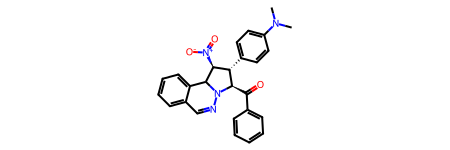

In [40]:
best_pic50 = 0
best_smiles = ""
for i in range(len(hits_pic50)):
  if hits_pic50[i] > best_pic50:
    best_pic50 = hits_pic50[i]
    best_smiles = hits_smiles[i]
print(best_pic50)
print(best_smiles)
mol = Chem.MolFromSmiles(best_smiles)
mol